In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

In [2]:
def save_fig(fig, name):
    fig.savefig("graphs/{}.png".format(name), format="png", dpi=500)
    fig.savefig("graphs/{}.pdf".format(name), format="pdf", dpi=500)

Change `json_path` here

In [3]:
json_path = './data_balancers_prediction_accuracy_single.json'

In [4]:
with open(json_path) as f:
    data = json.load(f)
timings = []
for d in data["datapoints"]:
    s = d["setting"]
    comp = list(map(lambda x: (x["computationTime"]),
                    sorted(d["data"]["workers"], key=lambda x: x["rank"])))
    comp = max(comp)
    timings.append((comp, d['data']["balancer"]['time'], s['predictionAccuracy']))

#print(len(timings), timings)

In [5]:
cpT, balT, predA = zip(*timings)

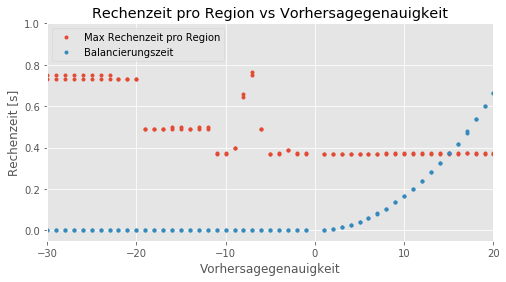

In [6]:
plt.style.use('ggplot')

x = np.asarray(predA)
#  time in s
cp = np.asarray(cpT) / 1e6
bal = np.asarray(balT) / 1e6


fig, host = plt.subplots(figsize=(8,4))
#par1 = host.twinx()

host.plot(x, cp, label="Max Rechenzeit pro Region", lw=0, marker=".")
host.plot(x, bal, label="Balancierungszeit", lw=0, marker=".")

host.set(xlabel='Vorhersagegenauigkeit', ylabel='Rechenzeit [s]',
    title='Rechenzeit pro Region vs Vorhersagegenauigkeit'
)
#host.axis([None, None, 0, 15])

#host.set(ylabel='Balancierungszeit [s]')
host.axis([-30, 20,-0.05, 1])
#par1.grid(False)


host.legend()
#par1.legend()
host.grid(True)
#plt.xticks(x)

save_fig(fig, "prediction_accuracy")
plt.show()